<a href="https://colab.research.google.com/github/suhaassanga/2216114_AIML_BootCamp/blob/Suhaas-Sanga/DecisionTree_SUVPred.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn import tree
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")
df

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0
...,...,...,...,...,...
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0


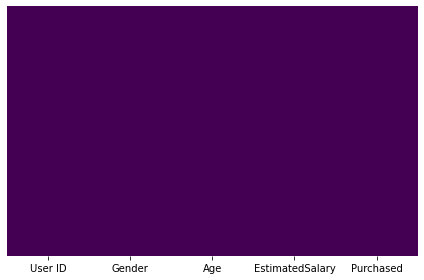

In [ ]:
import seaborn as sns
def get_heatmap(df):
    #This function gives heatmap of all NaN values
    plt.figure(figsize=(6,4))
    sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
    plt.tight_layout()
    return plt.show()

get_heatmap(df)

In [ ]:
df = df.drop('User ID',axis=1)
df = df.drop('Gender',axis=1)

In [ ]:
# Importing StandardScaler from scikit-learn
from sklearn.preprocessing import StandardScaler
sst = StandardScaler()
data_scaled=df.iloc[:,:-1].values
data_scaled=sst.fit_transform(data_scaled)
data_scaled=pd.DataFrame(data_scaled)

In [ ]:
data_scaled.head()

,0,1
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled.columns=['Age','EstimatedSalary']

In [ ]:
data_scaled.head()

,Age,EstimatedSalary
0,-1.781797,-1.490046
1,-0.253587,-1.460681
2,-1.113206,-0.785290
3,-1.017692,-0.374182
4,-1.781797,0.183751


In [ ]:
data_scaled['Purchased'] = df.Purchased

In [ ]:
data_scaled = data_scaled[data_scaled['Purchased'].notna()]

In [ ]:
data_scaled

,Age,EstimatedSalary,Purchased
0,-1.781797,-1.490046,0
1,-0.253587,-1.460681,0
2,-1.113206,-0.785290,0
3,-1.017692,-0.374182,0
4,-1.781797,0.183751,0
...,...,...,...
395,0.797057,-0.844019,1
396,1.274623,-1.372587,1
397,1.179110,-1.460681,1
398,-0.158074,-1.078938,0


In [ ]:
x=np.array(data_scaled[['EstimatedSalary','Age']])
y=np.array(data_scaled[['Purchased']])

In [ ]:
#spliting the data  into training and testing set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=3)

In [ ]:
model = DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
x_train

array([[ 2.15119598,  1.46564897],
       [ 0.06629116, -0.25358736],
       [ 2.32738512,  0.41500455],
       [-1.40195167,  0.70154394],
       [-0.55037082,  0.89257019],
       [ 0.30121002,  0.41500455],
       [ 1.06469629,  0.12846516],
       [-0.31545197,  0.03295203],
       [-0.19799255,  0.31949142],
       [-0.57973568, -0.15807423],
       [ 1.38770971, -0.54012675],
       [-1.1083031 , -1.30423178],
       [ 0.06629116, -1.11320552],
       [ 2.18056084,  0.89257019],
       [-1.07893824,  0.98808332],
       [ 1.7988177 ,  0.98808332],
       [ 0.30121002, -0.73115301],
       [ 0.18375059,  2.03872775],
       [-0.84401939,  0.79705706],
       [-0.34481683, -1.01769239],
       [ 1.24088543, -0.34910049],
       [ 0.35993973, -1.87731056],
       [-0.46227625, -1.01769239],
       [ 0.27184516, -1.20871865],
       [-1.37258681,  1.94321462],
       [ 1.91627713, -0.54012675],
       [-1.54877595, -1.11320552],
       [ 1.123426  ,  0.41500455],
       [ 0.12502088,

In [ ]:
y_pred=model.predict(x_test)
np.set_printoptions(precision=2)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[1 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [1 1]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 1]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [0 0]
 [1 1]
 [1 0]
 [0 0]
 [0 0]
 [0 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [1 1]
 [0 0]
 [0 0]
 [1 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]
 [0 0]]


In [ ]:
y_pred  = model.predict(x_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0])

In [ ]:
print("Predicted value for training data:",model.score(x_train,y_train))
print("Training accuracy:",model.score(x_train,y_train)*100)

Predicted value for training data: 0.99375
Training accuracy: 99.375


In [ ]:
print("Predicted value for testing data:",model.score(x_test,y_test))
print("Testing accuracy:",model.score(x_test,y_test)*100)

Predicted value for testing data: 0.825
Testing accuracy: 82.5


In [ ]:
accuracy_score(y_test, y_pred)*100

82.5

In [ ]:
accuracy=model.score(x,y)*100
print(accuracy)

96.0


In [ ]:
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
print(cm)

[[48  7]
 [ 7 18]]


In [ ]:
y_train=y_train.flatten()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: The following kwargs were not used by contour: 'map'
  import sys
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


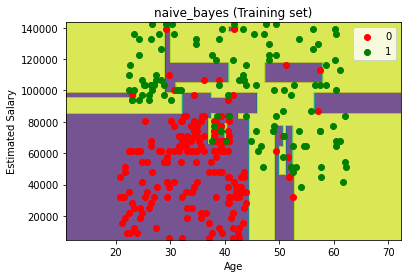

In [ ]:
import matplotlib.pyplot as plt
from matplotlib. colors import ListedColormap
x_set, y_set = sst.inverse_transform(x_train),y_train
x1,x2 = np.meshgrid(np. arange(start = x_set[:, 0].min( )-10,stop= x_set[:, 0].max() + 10, step = 0.25) ,
np.arange(start = x_set[:, 1].min( )- 1000, stop = x_set[:, 1].max ( ) + 1000, step = 0.25))
plt. contourf(x1,x2,model.predict(sst.transform(np.array([x1.ravel(), x2.ravel()]). T) ).reshape (x1. shape ),
alpha = 0.75, map = ListedColormap(('red','green' )) )
plt. xlim(x1.min( ), x1.max( ))
plt.ylim(x2.min( ), x2. max( ))
for i, j in enumerate(np.unique(y_set)):
  plt.scatter(x_set[y_set == j,0],x_set[y_set ==j,1],c = ListedColormap(('red','green'))(i),label=j)
plt. title('naive_bayes (Training set)')
plt.xlabel('Age')
plt. ylabel('Estimated Salary')
plt. legend()
plt.show()